In [196]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import average_precision_score, precision_recall_curve

In [197]:
f1 = pd.read_csv("train_change1.01.csv", skiprows=0)
f2 = pd.read_csv("test_change1.01.csv", skiprows=0)
f1['DEFAULTER'].value_counts()

0    2869
1     707
Name: DEFAULTER, dtype: int64

In [198]:
'''scl = preprocessing.StandardScaler()
fields = f1.columns.values[:-1]
clean_f1 = pd.DataFrame(scl.fit_transform(f1[fields]), columns=fields)
f1.to_csv('train_change2.01.csv')'''

"scl = preprocessing.StandardScaler()\nfields = f1.columns.values[:-1]\nclean_f1 = pd.DataFrame(scl.fit_transform(f1[fields]), columns=fields)\nf1.to_csv('train_change2.01.csv')"

In [199]:
f1.corr()

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
AMOUNT,1.000000,0.216158,0.343881,0.155840,0.096938,0.086427,-0.028885,0.095662,0.075257,0.068881,0.022059,0.004278,0.071263,-0.006072,-0.073777
DUE_MORTGAGE,0.216158,1.000000,0.806782,0.014579,0.308251,-0.059152,-0.001727,0.136292,0.305444,0.139190,-0.015275,-0.025594,0.042158,0.002948,-0.032781
VALUE,0.343881,0.806782,1.000000,0.009480,0.342185,0.041877,-0.001974,0.186059,0.278336,0.112910,-0.008110,-0.030334,0.021486,0.011571,-0.038833
REASON,0.155840,0.014579,0.009480,1.000000,-0.060802,-0.036506,-0.008104,-0.062918,0.121435,0.033590,0.013123,0.007232,0.118994,-0.014266,-0.027423
OCC,0.096938,0.308251,0.342185,-0.060802,1.000000,0.030049,0.040186,0.089771,0.212981,-0.004791,0.011205,-0.009355,-0.020064,0.025504,-0.017894
TJOB,0.086427,-0.059152,0.041877,-0.036506,0.030049,1.000000,0.079525,0.163986,0.067033,-0.022374,-0.008446,-0.047427,-0.023781,-0.025346,-0.040072
DCL,-0.028885,-0.001727,-0.001974,-0.008104,0.040186,0.079525,1.000000,0.022782,0.153513,0.004637,0.021173,0.151714,0.037149,-0.004644,0.311645
CLT,0.095662,0.136292,0.186059,-0.062918,0.089771,0.163986,0.022782,1.000000,0.246345,-0.030369,0.008125,-0.080185,-0.108828,-0.026346,-0.196008
CL_COUNT,0.075257,0.305444,0.278336,0.121435,0.212981,0.067033,0.153513,0.246345,1.000000,0.157337,-0.007738,0.055875,0.086867,-0.021643,-0.023683
RATIO,0.068881,0.139190,0.112910,0.033590,-0.004791,-0.022374,0.004637,-0.030369,0.157337,1.000000,-0.008735,0.029907,0.150397,-0.007268,0.120722


In [200]:
f1.iloc[:,0:-1].values

array([[1.51000e+04, 7.11680e+04, 9.74800e+04, ..., 0.00000e+00,
        1.00000e+00, 2.00950e+00],
       [2.11000e+04, 8.17470e+04, 1.09840e+05, ..., 0.00000e+00,
        1.00000e+00, 1.27240e+00],
       [1.59000e+04, 9.42620e+04, 1.28414e+05, ..., 0.00000e+00,
        2.00000e+00, 1.47250e+00],
       ...,
       [1.49000e+04, 5.04690e+04, 6.94020e+04, ..., 0.00000e+00,
        0.00000e+00, 1.38980e+00],
       [1.11000e+04, 1.16260e+05, 1.43298e+05, ..., 0.00000e+00,
        1.00000e+00, 2.59190e+00],
       [2.36000e+04, 4.48510e+04, 7.01710e+04, ..., 0.00000e+00,
        1.00000e+00, 1.55970e+00]])

In [201]:
f1.values.shape

(3576, 15)

In [202]:
f1

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,15100,71168.000000,97480.0,1,0,9.0,0,119.166667,19.0,33.650308,0,0,1,2.00950,1
1,21100,81747.000000,109840.0,1,0,1.0,0,174.786162,24.0,40.067527,0,0,1,1.27240,0
2,15900,94262.000000,128414.0,1,3,4.0,0,242.736126,42.0,39.231892,1,0,2,1.47250,0
3,12900,110899.000000,124480.0,1,2,7.0,0,204.900000,40.0,33.650308,0,1,2,1.57010,1
4,24600,74028.507532,35523.0,0,0,21.0,0,84.111988,15.0,29.865634,0,0,1,1.50130,0
5,15000,65742.000000,86608.0,0,0,1.0,0,289.581891,20.0,28.285563,0,0,0,1.51770,0
6,22800,75253.000000,106166.0,1,0,1.0,0,176.339376,24.0,38.266594,0,0,1,2.43220,0
7,23200,133766.000000,174085.0,1,3,26.0,3,333.409840,28.0,30.778638,0,0,0,0.82074,0
8,11900,117952.000000,125305.0,1,5,5.0,0,182.172065,18.0,33.210397,0,0,0,2.23040,0
9,13700,55763.000000,87480.0,1,4,9.0,0,194.766667,20.0,33.650308,0,0,0,1.24350,0


In [203]:
from sklearn.utils import shuffle
f1 = shuffle(f1)
part = int(f1.values.shape[0]*0.8)
f1.values

array([[1.45000e+04, 6.10200e+04, 8.88240e+04, ..., 0.00000e+00,
        2.55720e+00, 0.00000e+00],
       [1.57000e+04, 1.04357e+05, 1.37563e+05, ..., 0.00000e+00,
        1.45110e+00, 0.00000e+00],
       [9.50000e+03, 5.14040e+04, 8.41580e+04, ..., 0.00000e+00,
        2.05340e+00, 0.00000e+00],
       ...,
       [1.80000e+04, 6.34580e+04, 8.15160e+04, ..., 0.00000e+00,
        2.50350e+00, 0.00000e+00],
       [1.45000e+04, 8.00220e+04, 1.02203e+05, ..., 0.00000e+00,
        1.95230e+00, 0.00000e+00],
       [2.63000e+04, 7.49950e+04, 1.20839e+05, ..., 2.00000e+00,
        4.84730e-01, 0.00000e+00]])

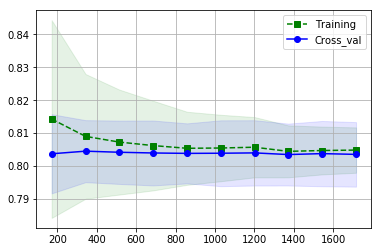

In [204]:
from sklearn.model_selection import learning_curve, ShuffleSplit
X = f1.iloc[:part,:-1].values
y = f1.iloc[:part,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = linear_model.LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 's--', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

LOGISTIC REGRESSION

In [205]:
from sklearn.model_selection import GridSearchCV
log = linear_model.LogisticRegression()
parameter_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
search_grid = GridSearchCV(log, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(X,y)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/home/selva/a/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [206]:
part_part = int(part*0.6)

In [207]:
model_logistic = linear_model.LogisticRegression(C=search_grid.best_estimator_.C)
model_logistic.fit(np.array(f1.iloc[:part_part,:-1].values), np.array(f1.iloc[:part_part,-1].values))
logistic_output_test = model_logistic.predict(np.array(f1.iloc[part:,:-1].values))
logistic_accuracy = accuracy_score(np.array(f1.iloc[part:,-1].values), logistic_output_test)
print(logistic_accuracy)

0.7946927374301676


Text(0.5,-11.7696,'Predicted label')

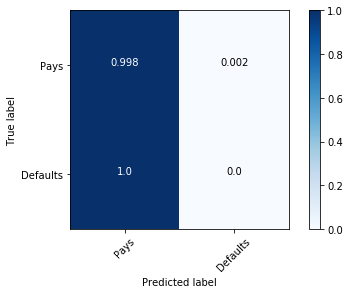

In [208]:
import itertools
from sklearn.metrics import confusion_matrix
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[part:,-1].values), logistic_output_test, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [209]:
linestyle = ['dotted', 'solid', 'dashed', 'dashdotdotted']

In [210]:
def plotAUC(truth, pred, lab, style):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (0, 0, 0)
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc, linestyle=style)
    #plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

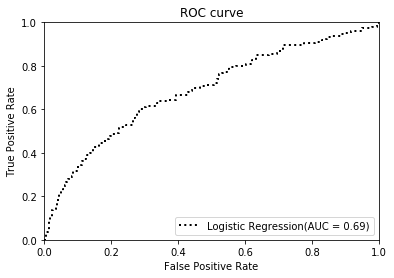

In [211]:
logistic_predict_probab = model_logistic.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), logistic_predict_probab,'Logistic Regression', linestyle[0])
#print(logistic_predict_probab)

K Nearest Neighbors

In [212]:
f1

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
1002,14500,61020.000000,88824.000000,0,0,1.0,0,296.792111,20.000000,30.313767,0,0,0,2.55720,0
130,15700,104357.000000,137563.000000,1,0,1.0,0,281.789801,46.000000,41.245236,0,0,0,1.45110,0
2476,9500,51404.000000,84158.000000,0,0,19.0,0,203.697963,16.000000,35.540613,0,0,0,2.05340,0
603,25700,196588.000000,247005.000000,1,0,8.0,0,106.425354,25.000000,42.680275,0,0,1,1.95190,0
831,12600,41200.000000,59980.000000,1,0,2.0,0,78.233333,12.000000,33.650308,0,0,0,2.13630,1
2372,36400,35186.000000,56512.000000,1,0,1.0,0,181.339737,0.000000,32.634532,0,0,7,1.35280,0
2861,11400,74028.507532,66325.000000,0,0,1.0,0,358.143819,6.000000,34.611974,0,0,0,0.70675,0
519,16100,69899.000000,87380.000000,1,1,18.0,3,146.866667,18.000000,33.650308,1,0,3,1.35210,1
2286,18700,98099.000000,123642.000000,1,1,0.0,3,242.642232,29.000000,41.060657,0,0,0,0.23468,0
885,13100,15273.000000,59289.000000,0,0,6.0,0,356.131229,21.000000,15.833616,0,2,1,1.03380,0


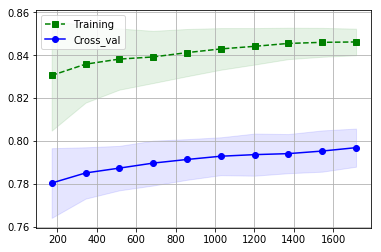

In [213]:
X = f1.iloc[:part,:-1].values
y = f1.iloc[:part,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = KNeighborsClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 's--', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [214]:
knn = KNeighborsClassifier()
parameter_grid = {'n_neighbors':[i for i in range(10, 100)]}
search_grid = GridSearchCV(knn, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:part,:-1].values, f1.iloc[:part,-1].values)
search_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [215]:
model_knn = KNeighborsClassifier(n_neighbors=search_grid.best_estimator_.n_neighbors)
model_knn.fit(np.array(f1.iloc[:part_part,:-1].values), np.array(f1.iloc[:part_part,-1].values))
knn_output_test = model_knn.predict(np.array(f1.iloc[part:,:-1].values))
knn_accuracy = accuracy_score(np.array(f1.iloc[part:,-1].values), knn_output_test)
print(knn_accuracy)

0.8100558659217877


Text(0.5,-11.7696,'Predicted label')

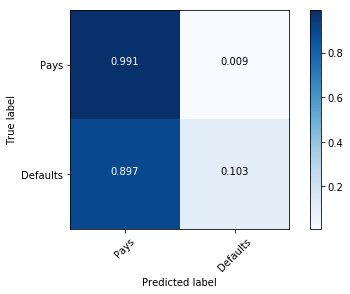

In [216]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[part:,-1].values), knn_output_test, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

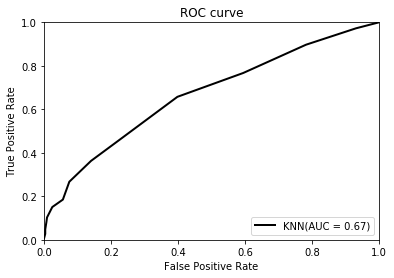

In [217]:
knn_predict_probab = model_knn.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), knn_predict_probab,'KNN', linestyle[1])

Multi-Level Perceptron Classification

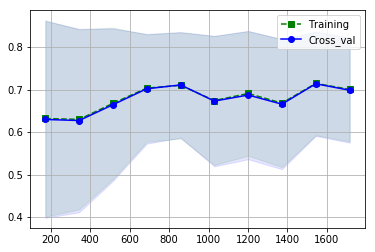

In [218]:
from sklearn.neural_network import MLPClassifier
X = f1.iloc[:part,:-1].values
y = f1.iloc[:part,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = MLPClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 's--', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [219]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='lbfgs', alpha=0.00001, hidden_layer_sizes=(5, 2))
model_nn.fit(np.array(f1.iloc[:part_part,:-1].values), np.array(f1.iloc[:part_part,-1].values))
nn_output_test = model_nn.predict(np.array(f1.iloc[part:,:-1].values))
nn_accuracy = accuracy_score(np.array(f1.iloc[part:,-1].values), nn_output_test)
print(nn_accuracy)

0.7960893854748603


Text(0.5,-11.7696,'Predicted label')

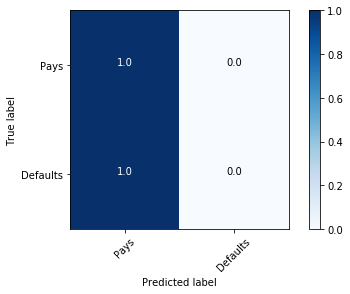

In [220]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[part:,-1].values), nn_output_test, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

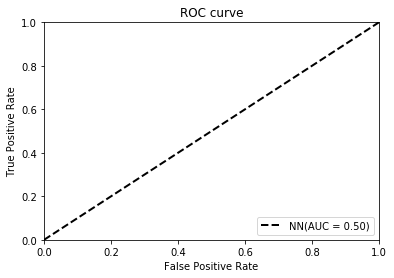

In [221]:
nn_predict_probab = model_nn.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), nn_predict_probab,'NN', linestyle[2])

Decision Tree Classification

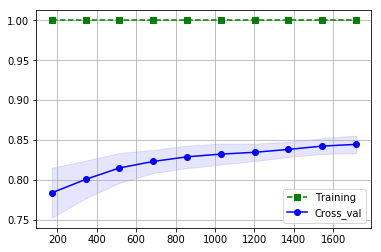

In [222]:
from sklearn import tree
X = f1.iloc[:part,:-1].values
y = f1.iloc[:part,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = tree.DecisionTreeClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 's--', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [223]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
parameter_grid = {'max_depth':[i for i in range(1,15)]}
search_grid = GridSearchCV(dt, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:part,:-1].values, f1.iloc[:part,-1].values)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


/home/selva/a/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [224]:
model_dtree = tree.DecisionTreeClassifier(max_depth=search_grid.best_estimator_.max_depth)
model_dtree.fit(f1.iloc[:part_part,:-1].values, f1.iloc[:part_part,-1].values)
dtree_output_test = model_dtree.predict(np.array(f1.iloc[part:,:-1].values))
dtree_accuracy = accuracy_score(np.array(f1.iloc[part:,-1].values), dtree_output_test)
print(dtree_accuracy)

0.8463687150837989


Text(0.5,-11.7696,'Predicted label')

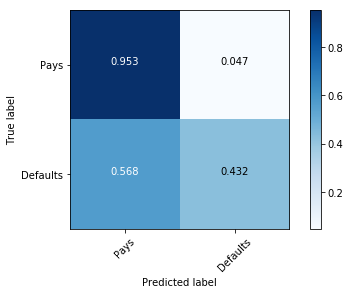

In [225]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[part:,-1].values), dtree_output_test, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

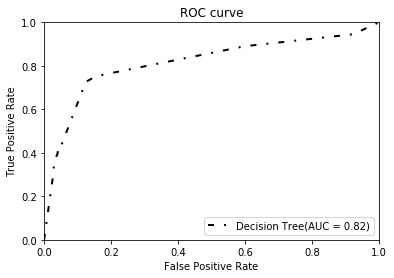

In [226]:
dtree_predict_probab = model_dtree.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), dtree_predict_probab,'Decision Tree', (0, (3, 5, 1, 5)))

K-Means Clustering

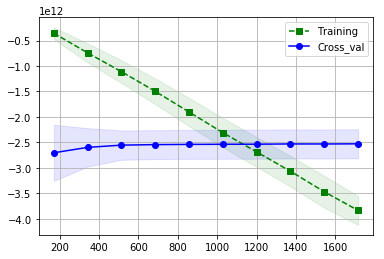

In [227]:
from sklearn.cluster import KMeans
X = f1.iloc[:part,:-1].values
y = f1.iloc[:part,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution =  KMeans(n_clusters=2)
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 's--', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [228]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(f1.iloc[:part_part,:-1].values, f1.iloc[:part_part,-1].values)
kmeans_output_test = model_kmeans.predict(np.array(f1.iloc[part:,:-1].values))
kmeans_accuracy = accuracy_score(np.array(f1.iloc[part:,-1].values), dtree_output_test)
print(kmeans_accuracy)

0.8463687150837989


Text(0.5,-11.7696,'Predicted label')

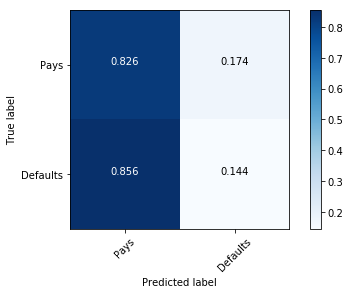

In [229]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[part:,-1].values), kmeans_output_test, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Cumulative auc-roc graph for all methods is as follows:

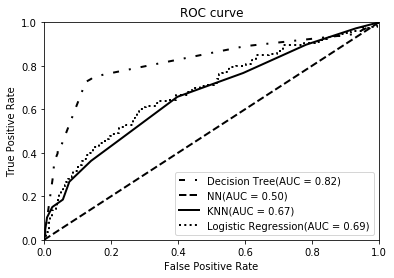

In [230]:
dtree_predict_probab = model_dtree.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), dtree_predict_probab,'Decision Tree',(0, (3, 5, 1, 5)))
nn_predict_probab = model_nn.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), nn_predict_probab,'NN', linestyle[2])
knn_predict_probab = model_knn.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), knn_predict_probab,'KNN', linestyle[1])
logistic_predict_probab = model_logistic.predict_proba(np.array(f1.iloc[part:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[part:,-1].values), logistic_predict_probab,'Logistic Regression', linestyle[0])

Now we make predictions over test where we dont have acutal labels
and we compare our results amoungst all predictions

In [231]:
f2 = pd.read_csv("test_change1.01.csv")
f2 = shuffle(f2)
f2

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
205,50900,44891.000000,108466.000000,0,5,6.0,0,205.962488,36.000000,40.781305,0,0,2,2.56730
94,20900,74028.507532,130452.000000,0,0,1.0,0,309.410354,21.000000,29.675452,0,0,3,2.70910
2312,17100,55719.000000,88663.000000,1,1,0.5,0,75.033333,23.000000,33.650308,0,0,0,2.41370
1199,16600,76948.000000,98638.000000,1,0,5.0,0,78.992816,21.000000,23.130074,0,3,0,2.17660
1916,22700,232899.000000,259980.000000,0,5,6.0,0,245.533333,51.000000,33.650308,1,1,3,2.16250
1239,34700,169859.000000,224696.000000,1,3,2.0,0,183.068461,21.000000,32.720205,0,0,2,1.97670
869,14900,86760.000000,93321.000000,0,1,4.0,0,163.023946,26.000000,42.907162,0,0,0,2.54590
1012,8300,72885.000000,87601.000000,1,1,14.0,1,87.545727,9.000000,24.707430,0,0,0,1.03760
2238,5000,74028.507532,28417.500000,0,0,4.0,0,181.339737,21.161056,33.650308,0,0,0,1.50380
50,19100,62255.000000,92279.000000,1,1,0.0,0,61.294143,23.000000,34.826959,0,0,0,2.02270


for Logistic Regresssion

In [232]:
u_logistic_output_test = model_logistic.predict(np.array(f2.iloc[:,:].values))

K-Means Clustering

In [233]:
u_kmeans_output_test = model_kmeans.predict(np.array(f2.iloc[:,:].values))

Decision Tree Classification

In [234]:
u_dtree_output_test = model_dtree.predict(np.array(f2.iloc[:,:].values))

K-Nearest Neigbhors Classification

In [235]:
u_knn_output_test = model_knn.predict(np.array(f2.iloc[:,:].values))

Multi-level Perceptron Classification 

In [236]:
u_nn_output_test = model_nn.predict(np.array(f2.iloc[:,:].values))

In [237]:
list_all_outputs = {}
list_all_outputs['u_logistic_output_test'] = u_logistic_output_test
list_all_outputs['u_kmeans_output_test'] = u_kmeans_output_test
list_all_outputs['u_dtree_output_test'] = u_dtree_output_test
list_all_outputs['u_knn_output_test'] = u_knn_output_test
list_all_outputs['u_nn_output_test'] = u_nn_output_test

In [238]:
visited = {'u_logistic_output_test':[], 'u_kmeans_output_test':[], 'u_dtree_output_test':[], 'u_knn_output_test':[], 'u_nn_output_test':[]}
for i in list_all_outputs.keys():
        for j in list_all_outputs.keys():
            if i != j:
                if i not in visited[j]:
                    visited[j].append(i)
                    visited[i].append(j)
                    count = 0
                    for k in range(len(list_all_outputs[i])):
                        if list_all_outputs[i][k] == list_all_outputs[j][k]:
                            count += 1
                    print(count*100/len(list_all_outputs[i]), i, '   and   ',j)


84.27013422818791 u_logistic_output_test    and    u_kmeans_output_test
87.33221476510067 u_logistic_output_test    and    u_dtree_output_test
97.60906040268456 u_logistic_output_test    and    u_knn_output_test
99.32885906040268 u_logistic_output_test    and    u_nn_output_test
74.8741610738255 u_kmeans_output_test    and    u_dtree_output_test
81.96308724832215 u_kmeans_output_test    and    u_knn_output_test
84.01845637583892 u_kmeans_output_test    and    u_nn_output_test
87.29026845637584 u_dtree_output_test    and    u_knn_output_test
87.41610738255034 u_dtree_output_test    and    u_nn_output_test
97.94463087248322 u_knn_output_test    and    u_nn_output_test


In [239]:
from sklearn.metrics import classification_report
print("logst", classification_report(np.array(f1.iloc[part:,-1].values), logistic_output_test))
print("k-nns", classification_report(np.array(f1.iloc[part:,-1].values), knn_output_test))
print("m-lpc", classification_report(np.array(f1.iloc[part:,-1].values), nn_output_test))
print("dtree", classification_report(np.array(f1.iloc[part:,-1].values), dtree_output_test))
print("kmean", classification_report(np.array(f1.iloc[part:,-1].values), kmeans_output_test))

logst              precision    recall  f1-score   support

          0       0.80      1.00      0.89       570
          1       0.00      0.00      0.00       146

avg / total       0.63      0.79      0.71       716

k-nns              precision    recall  f1-score   support

          0       0.81      0.99      0.89       570
          1       0.75      0.10      0.18       146

avg / total       0.80      0.81      0.75       716

m-lpc              precision    recall  f1-score   support

          0       0.80      1.00      0.89       570
          1       0.00      0.00      0.00       146

avg / total       0.63      0.80      0.71       716

dtree              precision    recall  f1-score   support

          0       0.87      0.95      0.91       570
          1       0.70      0.43      0.53       146

avg / total       0.83      0.85      0.83       716

kmean              precision    recall  f1-score   support

          0       0.79      0.83      0.81       570
   

/home/selva/a/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
